In [1]:
import pandas as pd

In [2]:
import random
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Data.csv",index_col=0)

In [4]:
df.head(10)

,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
Reference number,,,,,,,,,
CH14QV99NQ,http://thehimalayantimes.com/fullNews.php?head...,An 18-year-old youth was arrested March 25 on ...,Child,Molesting,Victim Father,Physical Injury,25/03/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
XJ99BF74EC,http://nepalpolice.gov.np/%E0%A4%9C%E0%A4%B5%E...,Police had taken under control Hitman Shahi (4...,Child,Attempted,Police,Physical Injury,03/04/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IG49WH92XY,http://nepalpolice.gov.np/2013-05-02-10-32-36....,Fourteen year old Devendra Rana and eleven yea...,Gang,Raped,Police,Physical Injury,01/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
IS62NJ41RL,http://nepalpolice.gov.np/2013-05-07-10-39-08....,Police on 07 May arrested Dharmaraj Jamarkatte...,Child,Raped,Police,Physical Injury,07/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
ZP39BS50LY,http://thehimalayantimes.com/fullNews.php?head...,Police on 08 May arrested Bhakta Bahadur Blon ...,Opportunist,Raped,Police,Physical Injury,08/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
LP22DS72LE,http://thehimalayantimes.com/fullNews.php?head...,Police on 16 May arrested a 43-year-old man of...,Opportunist,Attempted,Police,Physical Injury,16/05/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
MA88GP02AH,http://nepalpolice.gov.np/2013-06-09-10-53-36....,"Kamalesh Shah (15) of Sitamadi, India, current...",Child,Raped,Police,Physical Injury,05/06/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
XT54XX52NQ,http://nepalpolice.gov.np/2013-06-19-11-52-51....,"The Metropolitan Police Circle, Kalimati, on 1...",Child,Raped,Police,Physical Injury,19/06/2013,Kathmandu,"27.7199745185167, 85.32344429728326"
LT42OQ97BA,http://nepalpolice.gov.np/2013-06-21-09-27-17....,Police on 21 June had arrested Shyam Lal Shres...,Child,Raped,Police,Physical Injury,21/06/2013,Kathmandu,"27.55752119624532, 85.0217998274353"


### Impact Assesment: Analysis of the "Consequences of the attack " column to understand the impacts on survivors and their communities.This can hilight the need for support systems and rehabilitation services.

In [6]:
district_grp = pd.DataFrame(df.groupby(['Districts']).size())
district_grp.columns = ['Districts']
district_grp

,Districts
Districts,
Achham,5
Arghakhanchi,9
Baglung,16
Baitadi,14
Bajhang,9
...,...
Udaypur,1
Udhayapur,6
Western Rukum,1


In [7]:
consequences_counts = df['Consequences of the attack'].value_counts()

In [9]:
df["Consequences of the attack"].unique()

array(['Physical Injury ', 'Physical injury ', 'Physical injury',
       'mentally ill', 'Murder', 'Physical Injury', 'Pregnant',
       'physical Injury', 'pregnant ', 'death', 'murder', 'Murdered',
       'Physical Attack', ' pregnent', nan, ' Physical Injury ',
       ' murder', 'pregnant'], dtype=object)

In [10]:
df["Consequences of the attack"]=df["Consequences of the attack"].str.lower()
df["Consequences of the attack"]=df["Consequences of the attack"].str.strip()
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("murdered","murder")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("physical attack","physical Injury")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("pregnent","pregnant")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("dearth","death")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("mantally ill","Mentally ill")
df["Consequences of the attack"]=df["Consequences of the attack"].str.replace("physical injury","physical Injury")

In [11]:
df["Consequences of the attack"].unique()

array(['physical Injury', 'mentally ill', 'murder', 'pregnant', 'death',
       nan], dtype=object)

In [12]:
len(df["Districts"].unique())

150

In [13]:
df["Districts"]=df["Districts"].str.lower()
df["Districts"]=df["Districts"].str.strip()
df["Districts"]=df["Districts"].str.replace("kaverepalanchowk","kavrepalanchok")
df["Districts"]=df["Districts"].str.replace("sunsary","sunsari")
df["Districts"]=df["Districts"].str.replace("rupendhi","rupandehi")
df["Districts"]=df["Districts"].str.replace("terahathum","terhathum")
df["Districts"]=df["Districts"].str.replace("solukhubmu","solukhumbu")
df["Districts"]=df["Districts"].str.replace("tehrathum","terhathum")
df["Districts"]=df["Districts"].str.replace("terathum","terhathum")
df["Districts"]=df["Districts"].str.replace("rupandahi","rupandehi")
df["Districts"]=df["Districts"].str.replace("rupandhi","rupandehi")
df["Districts"]=df["Districts"].str.replace("sindupalchok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindupalchowk","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhupalachok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhhupalchok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhupalchok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhuplchwok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhuplchowk","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("sindhupalchwok","sindhupalchowk")
df["Districts"]=df["Districts"].str.replace("mohattari","mahottari")
df["Districts"]=df["Districts"].str.replace("ruoendehi","rupandehi")
df["Districts"]=df["Districts"].str.replace("rupendehi","rupandehi")
df["Districts"]=df["Districts"].str.replace("western rukum","rukum")
df["Districts"]=df["Districts"].str.replace("rukum west, karnali","rukum")
df["Districts"]=df["Districts"].str.replace("rukum \(west\)","rukum")
df["Districts"]=df["Districts"].str.replace("rukum west","rukum")
df["Districts"]=df["Districts"].str.replace("rukum east","rukum")
df["Districts"]=df["Districts"].str.replace("kabhrepalanchok","kavre")
df["Districts"]=df["Districts"].str.replace("kavrepalanchock","kavre")
df["Districts"]=df["Districts"].str.replace("kaverepalanchok","kavre")
df["Districts"]=df["Districts"].str.replace("kavrepalanchok","kavre")
df["Districts"]=df["Districts"].str.replace("bhojur","bhojpur")
df["Districts"]=df["Districts"].str.replace("sayangja","syangja")
df["Districts"]=df["Districts"].str.replace("sayanja","syangja")
df["Districts"]=df["Districts"].str.replace("panchathar","panchthar")
df["Districts"]=df["Districts"].str.replace("pachthar","panchthar")
df["Districts"]=df["Districts"].str.replace("tahanu","tanahu")
df["Districts"]=df["Districts"].str.replace("tanahun","tanahu")
df["Districts"]=df["Districts"].str.replace("udhayapur","udayapur")
df["Districts"]=df["Districts"].str.replace("udaypur","udayapur")
df["Districts"]=df["Districts"].str.replace("udaipur","udayapur")
df["Districts"]=df["Districts"].str.replace("ilam","illam")
df["Districts"]=df["Districts"].str.replace("kapilbastu","kapilvastu")
df["Districts"]=df["Districts"].str.replace("bardia","bardiya")
df["Districts"]=df["Districts"].str.replace("dailekh","dailekh")
df["Districts"]=df["Districts"].str.replace("taplegunj","taplejung")
df["Districts"]=df["Districts"].str.replace("dolkha","dolakha")
df["Districts"]=df["Districts"].str.replace("nawaparasi west","nawalparasi")
df["Districts"]=df["Districts"].str.replace("nawalparasi west","nawalparasi")
df["Districts"]=df["Districts"].str.replace("nawalparasi east","nawalparasi")
df["Districts"]=df["Districts"].str.replace("pratappur","nawalparasi")
df["Districts"]=df["Districts"].str.replace("sapatari","saptari")
df["Districts"]=df["Districts"].str.replace("chitawan","chitwan")
df["Districts"]=df["Districts"].str.replace("solukhumbhu","solukhumbu")
df["Districts"]=df["Districts"].str.replace("solukhubmu","solukhumbu")
df["Districts"]=df["Districts"].str.replace("shankhuwasabha","sankhuwasabha")
df["Districts"]=df["Districts"].str.replace("bakya","banke")
df["Districts"]=df["Districts"].str.replace("rampur, palpa","palpa")
df["Districts"]=df["Districts"].str.replace("gandaki, parbat","parbat")
df["Districts"]=df["Districts"].str.replace("gandaki, myagdi","myagdi")
df["Districts"]=df["Districts"].str.replace("karnali, dailekh","dailekh")
df["Districts"]=df["Districts"].str.replace("mades,bara","bara")
df["Districts"]=df["Districts"].str.replace("kritipur","kathmandu")
df["Districts"]=df["Districts"].str.replace("okheldunga","okhaldhunga")
df["Districts"]=df["Districts"].str.replace("mades,bara","bara")
df["Districts"]=df["Districts"].str.replace("birgunj","parsa")
df["Districts"]=df["Districts"].str.replace("hetauda","makwanpur")
df["Districts"]=df["Districts"].str.replace("pokhara","kaski")
df["Districts"]=df["Districts"].str.replace("itahari","sunsari")
df["Districts"]=df["Districts"].str.replace("lumbini","rupandehi")
df["Districts"]=df["Districts"].str.replace("dharan","sunsari")
df["Districts"]=df["Districts"].str.replace("bardibas","mahottari")
df["Districts"]=df["Districts"].str.replace("dhanusha","dhanusa")
df["Districts"]=df["Districts"].str.replace("madi","chitwan")

In [14]:
df[df["Districts"] == 'sudurpachim']

,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
Reference number,,,,,,,,,
SS16MI03XR,https://pahilopost.com/content/20210715085231....,"Maya, a 15-year-old girl with intellectual dis...",Child,Raped,Police,physical Injury,15/07/2021,sudurpachim,NaN


In [15]:
df["Districts"].unique()

array(['kathmandu', 'siraha', 'jhapa', 'rautahat', 'mahottari', 'sunsari',
       'rupandehi', 'morang', 'sindhupalchowk', 'khotang', 'rukum',
       'palpa', 'lamjung', 'gulmi', 'kavre', 'kaski', 'banke', 'bara',
       'bhaktapur', 'pyuthan', 'sarlahi', 'bhojpur', 'terhathum', 'dang',
       'syangja', 'kailali', 'kanchanpur', 'gorkha', 'dadeldhura',
       'dhanusa', 'panchthar', 'sindhuli', 'tanahu', 'udayapur',
       'makwanpur', 'illam', 'rasuwa', 'kapilvastu', 'baglung', 'bardiya',
       'jajarkot', 'lalitpur', 'dailekh', 'myagdi', 'arghakhanchi',
       'taplejung', 'dolakha', 'nawalparasi', 'darchula', 'salyan',
       'surkhet', 'parsa', 'parbat', 'saptari', 'kalikot', 'chitwan',
       'baitadi', 'bajura', 'nuwakot', 'bajhang', 'jumla', 'solukhumbu',
       'mugu', 'dhading', 'dhankuta', 'doti', 'achham', 'okhaldhunga',
       'ramechhap', 'mustang', 'dolpa', 'sankhuwasabha', 'rukum (west)',
       nan, 'humla', 'rolpa', 'manang', 'sudurpachim'], dtype=object)

In [16]:
len(df["Districts"].unique())

78

In [17]:
df

,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
Reference number,,,,,,,,,
CH14QV99NQ,http://thehimalayantimes.com/fullNews.php?head...,An 18-year-old youth was arrested March 25 on ...,Child,Molesting,Victim Father,physical Injury,25/03/2013,kathmandu,"27.7199745185167, 85.32344429728326"
XJ99BF74EC,http://nepalpolice.gov.np/%E0%A4%9C%E0%A4%B5%E...,Police had taken under control Hitman Shahi (4...,Child,Attempted,Police,physical Injury,03/04/2013,kathmandu,"27.7199745185167, 85.32344429728326"
IG49WH92XY,http://nepalpolice.gov.np/2013-05-02-10-32-36....,Fourteen year old Devendra Rana and eleven yea...,Gang,Raped,Police,physical Injury,01/05/2013,kathmandu,"27.7199745185167, 85.32344429728326"
IS62NJ41RL,http://nepalpolice.gov.np/2013-05-07-10-39-08....,Police on 07 May arrested Dharmaraj Jamarkatte...,Child,Raped,Police,physical Injury,07/05/2013,kathmandu,"27.7199745185167, 85.32344429728326"
ZP39BS50LY,http://thehimalayantimes.com/fullNews.php?head...,Police on 08 May arrested Bhakta Bahadur Blon ...,Opportunist,Raped,Police,physical Injury,08/05/2013,kathmandu,"27.7199745185167, 85.32344429728326"
...,...,...,...,...,...,...,...,...,...
VQ02QJ16IA,https://nepalmonitor.org/reports/view/41875,One person has been arrested on charges of rap...,Opportunist,Rape,Police,physical Injury,14/06/2023,lalitpur,"27.662405818404125, 85.32435296718468"
OS92RX27HN,https://nepalpolice.gov.np/news/3741/,"Baglung, a 17-year-old boy living in Nisikhola...",Child,Rape,Police,physical Injury,09/07/2023,baglung,"28.28119980900559, 83.58164488651326"
LW75CB63DB,https://nepalpolice.gov.np/news/3746/,"Jhapa, 31-year-old Dhan Kumar Limbu, resident ...",Opportunist,Rape,Police,physical Injury,07/02/2023,jhapa,"26.577739181619766, 87.89718581504616"


In [18]:
df.dropna(inplace = True)

In [19]:
df.reset_index()

,Reference number,Source,Description of Incidents,Type of Attack,Attempted or Raped,Who was it reported to,Consequences of the attack,Date of Incident,Districts,Geographical Region
0,CH14QV99NQ,http://thehimalayantimes.com/fullNews.php?head...,An 18-year-old youth was arrested March 25 on ...,Child,Molesting,Victim Father,physical Injury,25/03/2013,kathmandu,"27.7199745185167, 85.32344429728326"
1,XJ99BF74EC,http://nepalpolice.gov.np/%E0%A4%9C%E0%A4%B5%E...,Police had taken under control Hitman Shahi (4...,Child,Attempted,Police,physical Injury,03/04/2013,kathmandu,"27.7199745185167, 85.32344429728326"
2,IG49WH92XY,http://nepalpolice.gov.np/2013-05-02-10-32-36....,Fourteen year old Devendra Rana and eleven yea...,Gang,Raped,Police,physical Injury,01/05/2013,kathmandu,"27.7199745185167, 85.32344429728326"
3,IS62NJ41RL,http://nepalpolice.gov.np/2013-05-07-10-39-08....,Police on 07 May arrested Dharmaraj Jamarkatte...,Child,Raped,Police,physical Injury,07/05/2013,kathmandu,"27.7199745185167, 85.32344429728326"
4,ZP39BS50LY,http://thehimalayantimes.com/fullNews.php?head...,Police on 08 May arrested Bhakta Bahadur Blon ...,Opportunist,Raped,Police,physical Injury,08/05/2013,kathmandu,"27.7199745185167, 85.32344429728326"
...,...,...,...,...,...,...,...,...,...,...
1898,VQ02QJ16IA,https://nepalmonitor.org/reports/view/41875,One person has been arrested on charges of rap...,Opportunist,Rape,Police,physical Injury,14/06/2023,lalitpur,"27.662405818404125, 85.32435296718468"
1899,OS92RX27HN,https://nepalpolice.gov.np/news/3741/,"Baglung, a 17-year-old boy living in Nisikhola...",Child,Rape,Police,physical Injury,09/07/2023,baglung,"28.28119980900559, 83.58164488651326"
1900,LW75CB63DB,https://nepalpolice.gov.np/news/3746/,"Jhapa, 31-year-old Dhan Kumar Limbu, resident ...",Opportunist,Rape,Police,physical Injury,07/02/2023,jhapa,"26.577739181619766, 87.89718581504616"
1901,KH48LW89IO,https://nepalpolice.gov.np/news/3767/,"Baglung, Police arrested 28-year-old Bimal Ham...",Opportunist,Rape,Police,physical Injury,12/07/2023,baglung,"28.28104863825078, 83.58215987061996"


In [20]:
count_data = df.groupby(['Districts', 'Consequences of the attack']).size().unstack(fill_value=0)

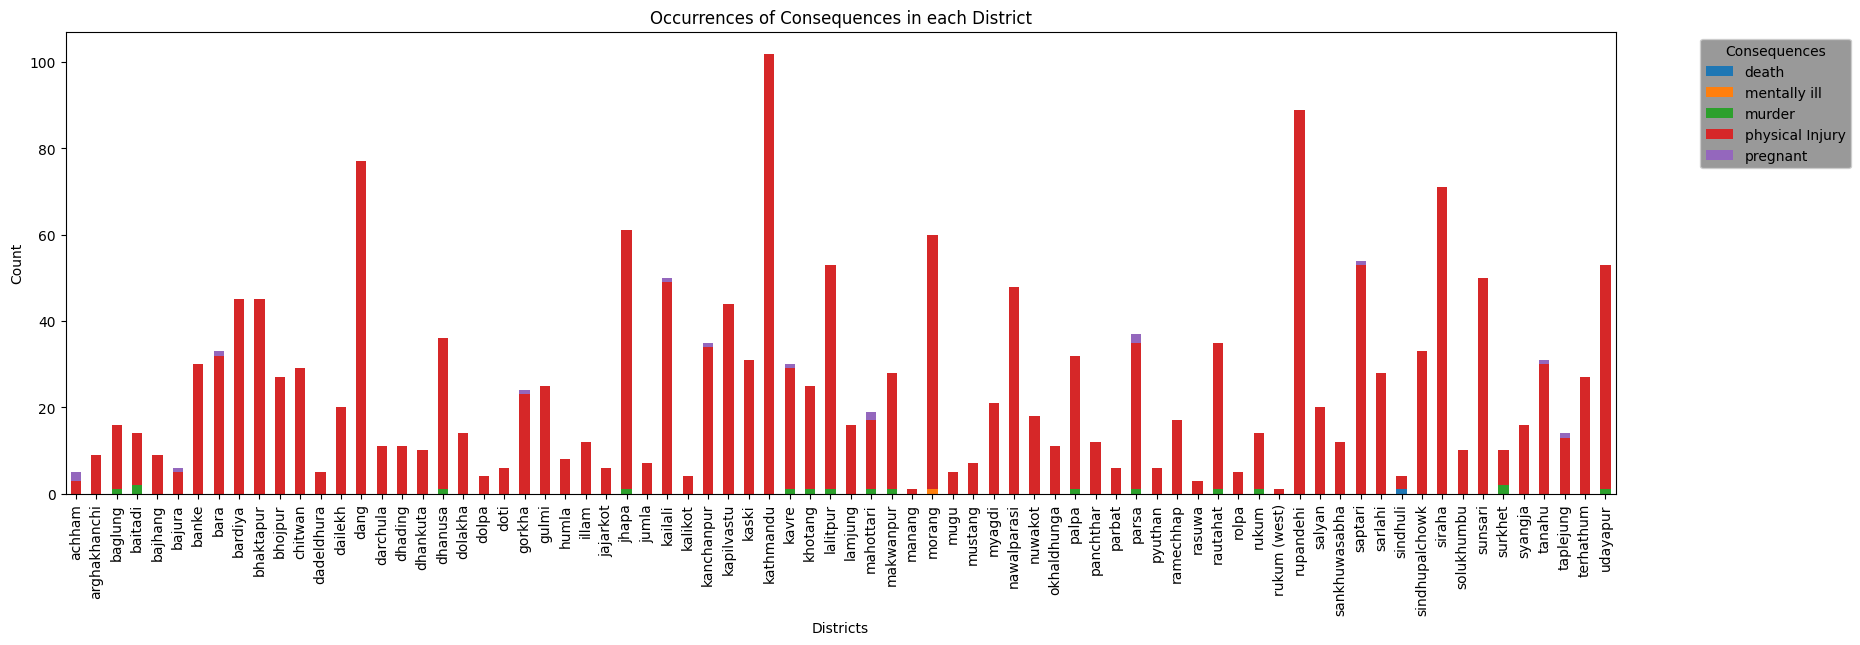

In [30]:
count_data.plot(kind='bar', stacked=True, figsize=(20, 6))
plt.xlabel('Districts')
plt.ylabel('Count')
plt.title('Occurrences of Consequences in each District')
plt.legend(title='Consequences', bbox_to_anchor=(1.05, 1), loc='upper left',facecolor="grey")
plt.show()


##### From the bar graph above representing the consequences,we observe that the highest rate of occurrence is attributed to "physical injury".This indicates that survivors most commonly experience physical harm as a consequence of the crime,underlining the immediate and tangible impact on their well-being.In Kathmandu,the prevalence of consequences resulting from the data set is highest, with a notable emphasis on "Physical Injury"(almost no other consequences).
#####  As of the current data, the districts of Manang and Rukum exhibit the lowest incidence of consequences arising from rape compared to the others.
##### Survivors often experience significant psychological and emotional trauma. Common psychological consequences include mental illness,anxiety, depression, post-traumatic stress disorder (PTSD), feelings of shame, guilt, fear, and self-blame. The emotional impact can be long-lasting and may require therapy and counseling for healing.And for this,Morang stands out as a district warranting attention. Similarly , we can observe other consequences in districts from the graph.

##### Understanding the consequences of rape is crucial for policymakers, support organizations, and communities to provide vital assistance to survivors. It highlights the need for comprehensive measures, including better access to medical and mental health services, legal protection and justice, community awareness, and education. Prevention efforts must promote consent, healthy relationships, and gender equality to foster safer communities for all.